# Project Stage 1

**2.1: Group Members [Bhagyashree Aras and Supraja Amrutha]**

**2.2: Problem Formulation/Introduction**

**2.2.1: GIVEN PASSENGER IMFORMATION, WILL PASSENGER SURVIVE THE TITANIC SINKING?**
>We are given the passenger data of Titanic ship on it's first voyage on April 15, 1912, with their age, gender and socio-economic class etc. 
There were a total of 2224 passengers on board, out of which a subset of 1309 data set has been provided with a split of 891 X 12 train data 
set and 418 X 11 test data set. we have to build a machine learning model which can predict what sort of passengers are likely to survive the 
sinking of Titanic. The model will be trained on train data set and the predictions are made for test data set. According to our understanding
we consider this problem statement as a discovery problem as there is no prior evidence to prove that a particualr passenger will survive or not.

**2.2.2: According to the problem, what's the data population?**

DATA POPULATION: PASSENGER DATA
>The given data is the data for 891 (train data set) passengers who were on board and for our prediction we are utilizing this subset of data 
of passengers from the whole amount of 2224. So the data population is a sample of the whole passenger data.



**2.3: Data**

**2.3.1: Kaggle account username for our team: bhagyashreearas**

**2.3.2: Downloading the data, displaying several lines of data and description of what data is about**

In [1]:
# IMPORTING THE STANDARD LIBRARIES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
training_file='train.csv'
print(training_file, "======================")
with open(training_file, "r") as f:
    for i in range(10):
        print(i, "\t", repr(f.readline()))

train.csv ======================
0 	 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'
2 	 '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n'
3 	 '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'
4 	 '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n'
5 	 '5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n'
6 	 '6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n'
7 	 '7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n'
8 	 '8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n'
9 	 '9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n'


In [3]:
testing_file='test.csv'
print(testing_file, "======================")
with open(testing_file, "r") as f:
    for i in range(10):
        print(i, "\t", repr(f.readline()))

test.csv ======================
0 	 'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\n'
2 	 '893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\n'
3 	 '894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\n'
4 	 '895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\n'
5 	 '896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\n'
6 	 '897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\n'
7 	 '898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\n'
8 	 '899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\n'
9 	 '900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\n'


Description of train and test data:

>In the training data set there are 891 rows and 12 columns. Each row in the data set represents a passenger's information with unique passenger ID. the columns in the train data set are : 
* PassengerId: Unique ID to identify passenger, 
* Survived: whether that particular passenger survived or not,
* Pclass: is ticket class which also represents their socio-economic status
* Name: name of the passenger
* Sex: It determines the sex of the passenger whether male or female.
* Age: Represnets age of passenger and the data type is float. age can be less than 1.
* sibsp: This includes total of siblings and spouse of the passenger (mistresses and fiancés were ignored)
* parch: This includes number of parents or children they are travelling with, if children travelling with nanny then this number will be 0
* Ticket: Ticket number of the passenger
* Fare: fare of their ticket purchased
* Cabin: cabin number alloted to the passenger
* Embarked: it is the Port of Embarkation including C = Cherbourg, Q = Queenstown, S = Southampton

In test data, each and every column of train data is present except for survided column which we need to predict


**2.3.3: Data Wrangling:**

In [4]:
# importing the data and transforming the data into a data frame or data frames for analysis or visualization

train_data = pd.read_csv("train.csv")
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
test_data = pd.read_csv("test.csv")
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

**STRUCTURE**

In [6]:
#Checking for the shape of train data whether it is rectangle
train_data.shape

(891, 12)

In [7]:
#Checking for the shape of test data whether it is rectangle
test_data.shape

(418, 11)

In [8]:
#Checking for the data types of the each column in train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Checking for the data types of the each column in test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
#understanding the train data
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [11]:
#Understanding data
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# Checking how many survived
train_data.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0, 0.5, 'Density')

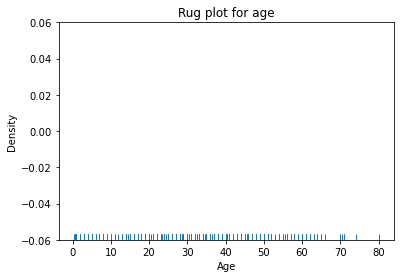

In [13]:
sns.rugplot(data = train_data, x="Age")
plt.title('Rug plot for age')
plt.ylabel('Density')

>Structure of the data is rectangular after converting it into the data frame. We can see the shape of the data also as shown above as it contains 891 rows and 12 columns. The info() function also gives us information about the train data types and number of rows with non-null vallues etc. As we can see above, data types for the columns are what we expect.

>For example, Passenger ID is int type and age is taken as float because there are infants and children in the data who might be less than an 1 year old. We also checked for ouliers in age column but we did not find many ouliers which should be avoided. Similarly for ticket column, it is an object because the ticket can consist of string and value combined. 


**GRANULARITY**

In [14]:
#Checking unique number of passenger id for train dataset
train_data.groupby('PassengerId').nunique()

Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
PassengerId                                                                 
1                   1       1     1    1    1      1      1       1     1   
2                   1       1     1    1    1      1      1       1     1   
3                   1       1     1    1    1      1      1       1     1   
4                   1       1     1    1    1      1      1       1     1   
5                   1       1     1    1    1      1      1       1     1   
...               ...     ...   ...  ...  ...    ...    ...     ...   ...   
887                 1       1     1    1    1      1      1       1     1   
888                 1       1     1    1    1      1      1       1     1   
889                 1       1     1    1    0      1      1       1     1   
890                 1       1     1    1    1      1      1       1     1   
891                 1       1     1    1    1      1      1       1     1   

             Cabin  Embarked  
PassengerId                   
1                0         1  
2                1         1  
3                0         1  
4                1         1  
5                0         1  
...            ...       ...  
887              0         1  
888              1         1  
889              0         1  
890              1         1  
891              0         1  

[891 rows x 11 columns]

In [15]:
#Checking unique number of passenger id for test dataset

test_data.groupby('PassengerId').nunique()

Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
PassengerId                                                              
892               1     1    1    1      1      1       1     1      0   
893               1     1    1    1      1      1       1     1      0   
894               1     1    1    1      1      1       1     1      0   
895               1     1    1    1      1      1       1     1      0   
896               1     1    1    1      1      1       1     1      0   
...             ...   ...  ...  ...    ...    ...     ...   ...    ...   
1305              1     1    1    0      1      1       1     1      0   
1306              1     1    1    1      1      1       1     1      1   
1307              1     1    1    1      1      1       1     1      0   
1308              1     1    1    0      1      1       1     1      0   
1309              1     1    1    0      1      1       1     1      0   

             Embarked  
PassengerId            
892                 1  
893                 1  
894                 1  
895                 1  
896                 1  
...               ...  
1305                1  
1306                1  
1307                1  
1308                1  
1309                1  

[418 rows x 10 columns]

>Granularity: In the train and test data sets, each row represents information of exactly one individual person which is what we require. The property of granularity can be see above from the nunique fucntion which gives all the unique values which are equal to the number of rows in both data sets which proves that each row represents that the information is for
one unique individual. Hence the property of granularity is maintained in data.

**SCOPE**

Text(0.5, 1.0, 'Relationship between Passenger class and Number of passengers survived')

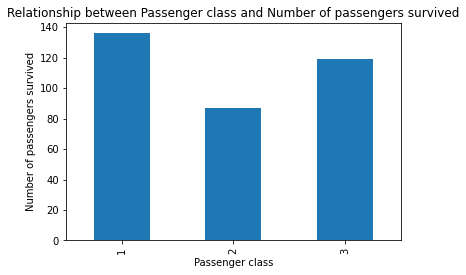

In [16]:
#Finding relationship between passenger class and number of passengers survived.
pclass_survived = train_data[(train_data["Survived"] == 1)]
pclass_survived = pclass_survived.groupby('Pclass').count()
pclass_survived = pclass_survived.iloc[:, 1]
pclass_survived.plot(kind="bar")
plt.ylabel('Number of passengers survived')
plt.xlabel('Passenger class')
plt.title('Relationship between Passenger class and Number of passengers survived')

In [17]:
#Checking passengers in each class
train_data.groupby('Pclass')['PassengerId'].nunique()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [18]:
#Checking percentage of passengers survived from each class
pclass_gender_survived = train_data[(train_data["Survived"] == 1)]
pclass_gender_survived = pclass_gender_survived.groupby(['Pclass']).count()
pclass_gender_survived = pclass_gender_survived.iloc[:, 1]
pclass_gender_survived = pclass_gender_survived.to_frame(name = 'total_survived').reset_index()
pclass_total =  train_data.groupby(['Pclass']).nunique()
pclass_total = pclass_total.iloc[:,0]
pclass_total = pclass_total.to_frame(name = 'total_passengers' ).reset_index()
pclass_gender_survived = pd.merge(pclass_total, pclass_gender_survived, how='left', on='Pclass' )
pclass_gender_survived['percent_survived'] = (pclass_gender_survived['total_survived'] / pclass_gender_survived['total_passengers'] ) * 100
pclass_gender_survived

Pclass  total_passengers  total_survived  percent_survived
0       1               216             136         62.962963
1       2               184              87         47.282609
2       3               491             119         24.236253

>Scope: Scope of the model is limited for only titanic passengers who are on board as the data contains socio economic class which is unique to titanic ship and we assume that pclass can 
vary for other commute. As you can see from above summary maximum  people survived from pclass 1 
followed by class 2 and class 3   

**TEMPORALITY**

>Temporality: 
As it is shown above, there is no specific column containing the time stamp of occurence of this event 
because according to information on kaggle, this event occured at the same time for all passengers on the ship on April 15, 1912

**FAITHFULLNESS**

In [19]:
#Finding the correlation to see the postive correlation among the features
correlation = train_data.corr()
correlation

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [20]:
# Checking for null values in train data
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Checking for null values in test data
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

>Faithfulness: As it is shown above, except for Age and Cabin columns there are no  other columns with major missing values. Age can be 
fixed by inserting mean age value in the null values as age is an  important feature to consider. But cabin has almost 75% missing values and we assume that this column is not of much use and it is better if we simply drop it instead of trying to 
tranform the cabin column. In test data one value for Fare column is missing which can be filled by dummy value
refering to the class of the passenger.

**2.3.4: Is data representative and assumptions**
>The data is representative for the sample given but if we are considering the whole data then the model
>will work under the following assumptions to make it represntative assumptions are: 

* As seen in the below graph line 27, the percentage of survival of infants and children is more (about 50%) 
when compared to other age groups. So the assumption is that age might be an important factor in the survival
of passengers.
* As calculated above in line 18, the percentage of survival of passengers from 1st class is higher than 
other two classes. So, one more assumption is that the survival might also be dependent on Pclass
* Also from the observations in lines 11 and 12, out of total survived, the survival of female passengers 
is almost 68% when compared to male passengers. So we are assuming that the survival rate depends on the 
gender of the passenger
* From the correlation table in line 19, it is shown that there is a postive correlation between sibsp and parch 
numbers which leads to the assumption that if a passenger is boarded along with parents/siblings there might be
more chance of survival of such passenger.




Text(0, 0.5, 'num of survvied passengers')

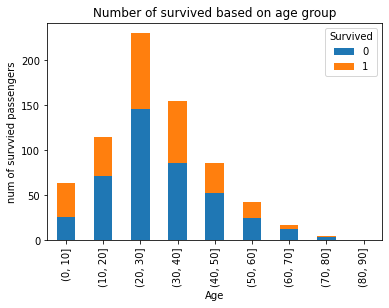

In [22]:
#Checking number of survived based on age group
train_data.groupby(['Survived', pd.cut(train_data['Age'], np.arange(0,100,10))]).size().unstack(0).plot.bar(stacked=True)
plt.title("Number of survived based on age group")
plt.ylabel('num of survvied passengers')

**2.3.5: Sampling Method**

In [23]:
#Checking number of passengers based on gender in train data
train_data.groupby('Sex')['PassengerId'].nunique()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [24]:
#Checking number of passengers based on gender in test data
test_data.groupby('Sex')['PassengerId'].nunique()

Sex
female    152
male      266
Name: PassengerId, dtype: int64

In [25]:
#Checking number of passengers based on pclass in train data
train_data.groupby(['Pclass'])['PassengerId'].nunique()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [26]:
#Checking number of passengers based on pclass in test data
test_data.groupby(['Pclass'])['PassengerId'].nunique()

Pclass
1    107
2     93
3    218
Name: PassengerId, dtype: int64

> Looking at the above results which show the total number of female and male passengers as well as 
 total number of passengers in each class, the kind of sampling that is used during the data collection
 seems to be stratified sampling. This is because the ratio of the female to male passengers in the train
 data is same as it is in the test data. Similarly, the ration of passengers in different classes is same
 in train as well as test data. Hence we strongly believe that stratified sampling is used while collecting
 data.